In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import os
from matplotlib import cm
from mayavi import mlab
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)

#Folders
projpath    = os.path.realpath("..")
pathvectors = os.path.join(projpath, "Results", "Vectors")
pathfacepca = os.path.join(projpath, "Results", "FacePCA")
pathmerged  = os.path.join(projpath, "Results", "MergedData")
pathdbases  = os.path.join(projpath, "DataBases")

#Read data
os.chdir(pathdbases)
ibd_fs = pd.read_csv("IBD_FS.csv", sep=",")

os.chdir(pathmerged)
mergeddat = pd.read_csv("MergedDat.csv", sep=",")

os.chdir(pathvectors)
sex_vectors = pd.read_csv("sex_vectors.csv", sep=",")

os.chdir(pathfacepca)
eigenvectors = pd.read_csv("eigenvectors.csv", sep=",", header=None)
means        = pd.read_csv("means.csv", sep=",", header=None)
facets       = pd.read_csv("facets.csv", sep=",", header=None)

#Getting landmarks from PCA scores
sex_landmarks = ( ( np.matrix(sex_vectors.iloc[:,0:67]) * 2)  * np.matrix(eigenvectors).transpose() ) + np.matrix(means).transpose()

#Getting landmarks for extreme PCs
PCs = np.zeros([4,67])
PCs[0][0] = (mergeddat.std()*3)[0]
PCs[1][0] = -(mergeddat.std()*3)[0]
PCs[2][1] = (mergeddat.std()*3)[1]
PCs[3][1] = -(mergeddat.std()*3)[1]
PCs_landmarks = ( np.matrix(PCs) * np.matrix(eigenvectors).transpose() ) + np.matrix(means).transpose()


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

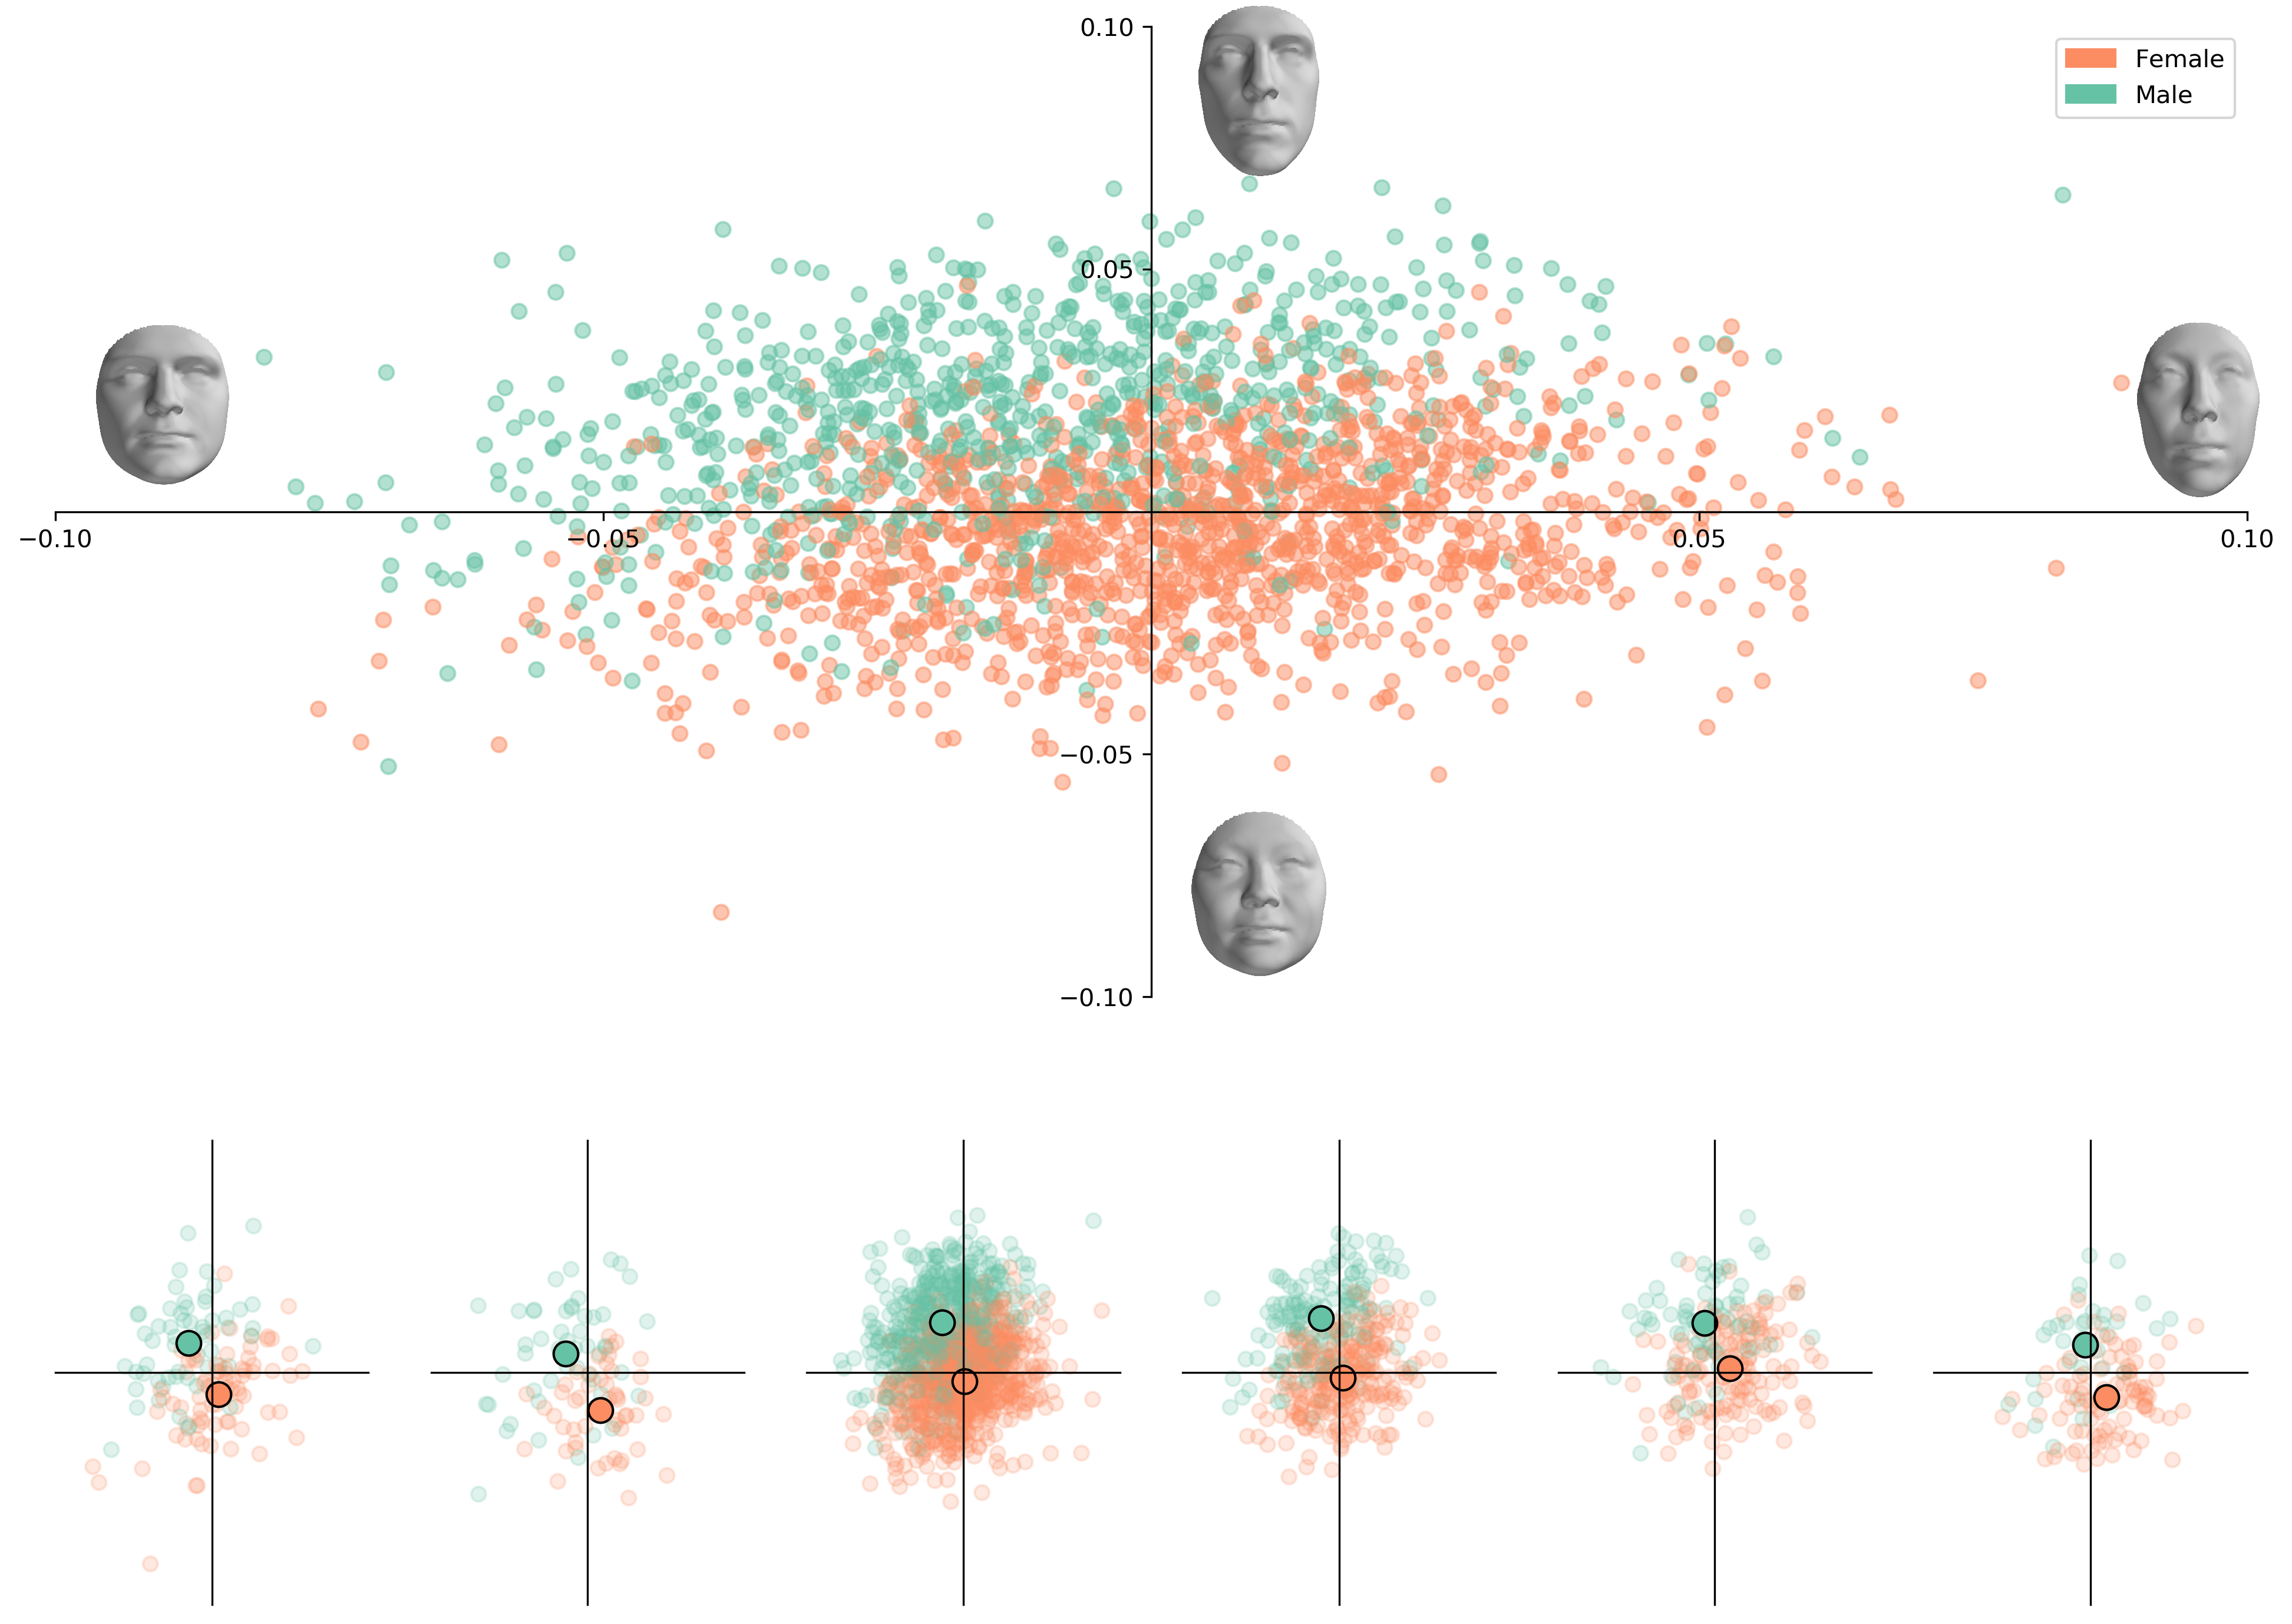

In [37]:
##### FIGURE 1 #####
#Scatter plot with PC scores and projected faces on top
#NEED TO ADD SEX_VECTOR ESTIMATION INSTEAD OF THE AVERAGE!!
def take_screenshot(landmarks):
    mlab.options.offscreen = True #True or False
    myfig = mlab.figure(bgcolor=(1, 1, 1), size=(2000, 1750)) 
    face = landmarks.reshape(7160, 3)
    X = np.array(face[:,0]).flatten()
    Y = np.array(face[:,1]).flatten()
    Z = np.array(face[:,2]).flatten()
    
    mesh = mlab.triangular_mesh(X,Y,Z, facets-1, representation='surface', figure = myfig, color=(0.7,0.7,0.7) )
    mesh.actor.property.backface_culling = True
    mesh.scene.anti_aliasing_frames = 20
    mesh.scene.camera.compute_view_plane_normal()
    mesh.scene.camera.position = [-0.005, -0.037, 0.067]
    mesh.scene.camera.view_up  = [-0.05, 1, 0.5]

    screenshot = mlab.screenshot(myfig, mode='rgba', antialiased=True)
    screenshot[ np.all(screenshot == 1, axis=2) ] = 0 #Set white background with alpha = 0, transparent
    mlab.close()
    return(screenshot)

def paste_screenshot(landmarks, pos = (0,0)):
    face = take_screenshot(landmarks)
    image = OffsetImage(face, zoom=0.05)
    ab = AnnotationBbox(image, pos, xycoords='data', frameon=False)
    ax.add_artist(ab)
    
def scatter_gm(x, y, group, nrow = 1, ncol = 1, index = 1, ticks = 1, xlim = [-0.1, 0.1], ylim = [-0.1, 0.1], means = 0):
    ax    = fig.add_subplot(nrow, ncol, index)
    color = group.map(color_map)
    if means == 0:
        al = 0.5
    elif means == 1:
        al = 0.2
        mean_male = [x[group=="Male"].mean(), y[group=="Male"].mean()]
        mean_female = [x[group=="Female"].mean(), y[group=="Female"].mean()]

    ax.scatter(x, y, alpha = al, c=color )
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data',0))
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('data',0))
    ax.set_xlim(xlim)
    ax.set_ylim(ylim) 
    
    if means == 1:
        ax.scatter(mean_female[0], mean_female[1], c = color_map['Female'], s=100, edgecolors='black' )
        ax.scatter(mean_male[0], mean_male[1], c = color_map['Male'], s=100, edgecolors='black' )
    
    if ticks == 1:
        plt.xticks([-0.1, -0.05, 0.05, 0.1])
        plt.yticks([-0.1, -0.05, 0.05, 0.1])
    elif ticks == 0:
        plt.xticks([])
        plt.yticks([])
        
    return(ax)

PC1 = mergeddat["FacePC1"]
PC2 = mergeddat["FacePC2"]
Sex = mergeddat["Sex"]

color_labels = Sex.unique()
rgb_values   = sns.color_palette("Set2", 2)
color_map    = dict(zip(color_labels, rgb_values))

fig = plt.figure(figsize=(16, 16), dpi=300)
ax  = scatter_gm(PC1, PC2, Sex, 2, 1, 1)

paste_screenshot(PCs_landmarks[0,:], (0.0957, 0.02) )
paste_screenshot(PCs_landmarks[1,:], (-0.09, 0.02) )
paste_screenshot(PCs_landmarks[2,:], (0.01, 0.085) )
paste_screenshot(PCs_landmarks[3,:], (0.01, -0.08) )

#Setting the legend
female_patch = mpatches.Circle( (0.5, 0.5), radius = 0.25, color=color_map["Female"], label='Female')
male_patch   = mpatches.Circle( (0.5, 0.5), radius = 0.25, color=color_map["Male"], label='Male')

plt.legend(handles=[female_patch, male_patch])

#Ploting small plots
for i in range(1,7):
    newPC1 = mergeddat[mergeddat['k6'] == i]['FacePC1'].reset_index(drop=True)
    newPC2 = mergeddat[mergeddat['k6'] == i]['FacePC2'].reset_index(drop=True)
    newSex = mergeddat[mergeddat['k6'] == i]['Sex'].reset_index(drop=True)
    index  = i + 12 
    scatter_gm(newPC1, newPC2, newSex, 4, 6, index, ticks=0, means=1) 
    
plt.show()

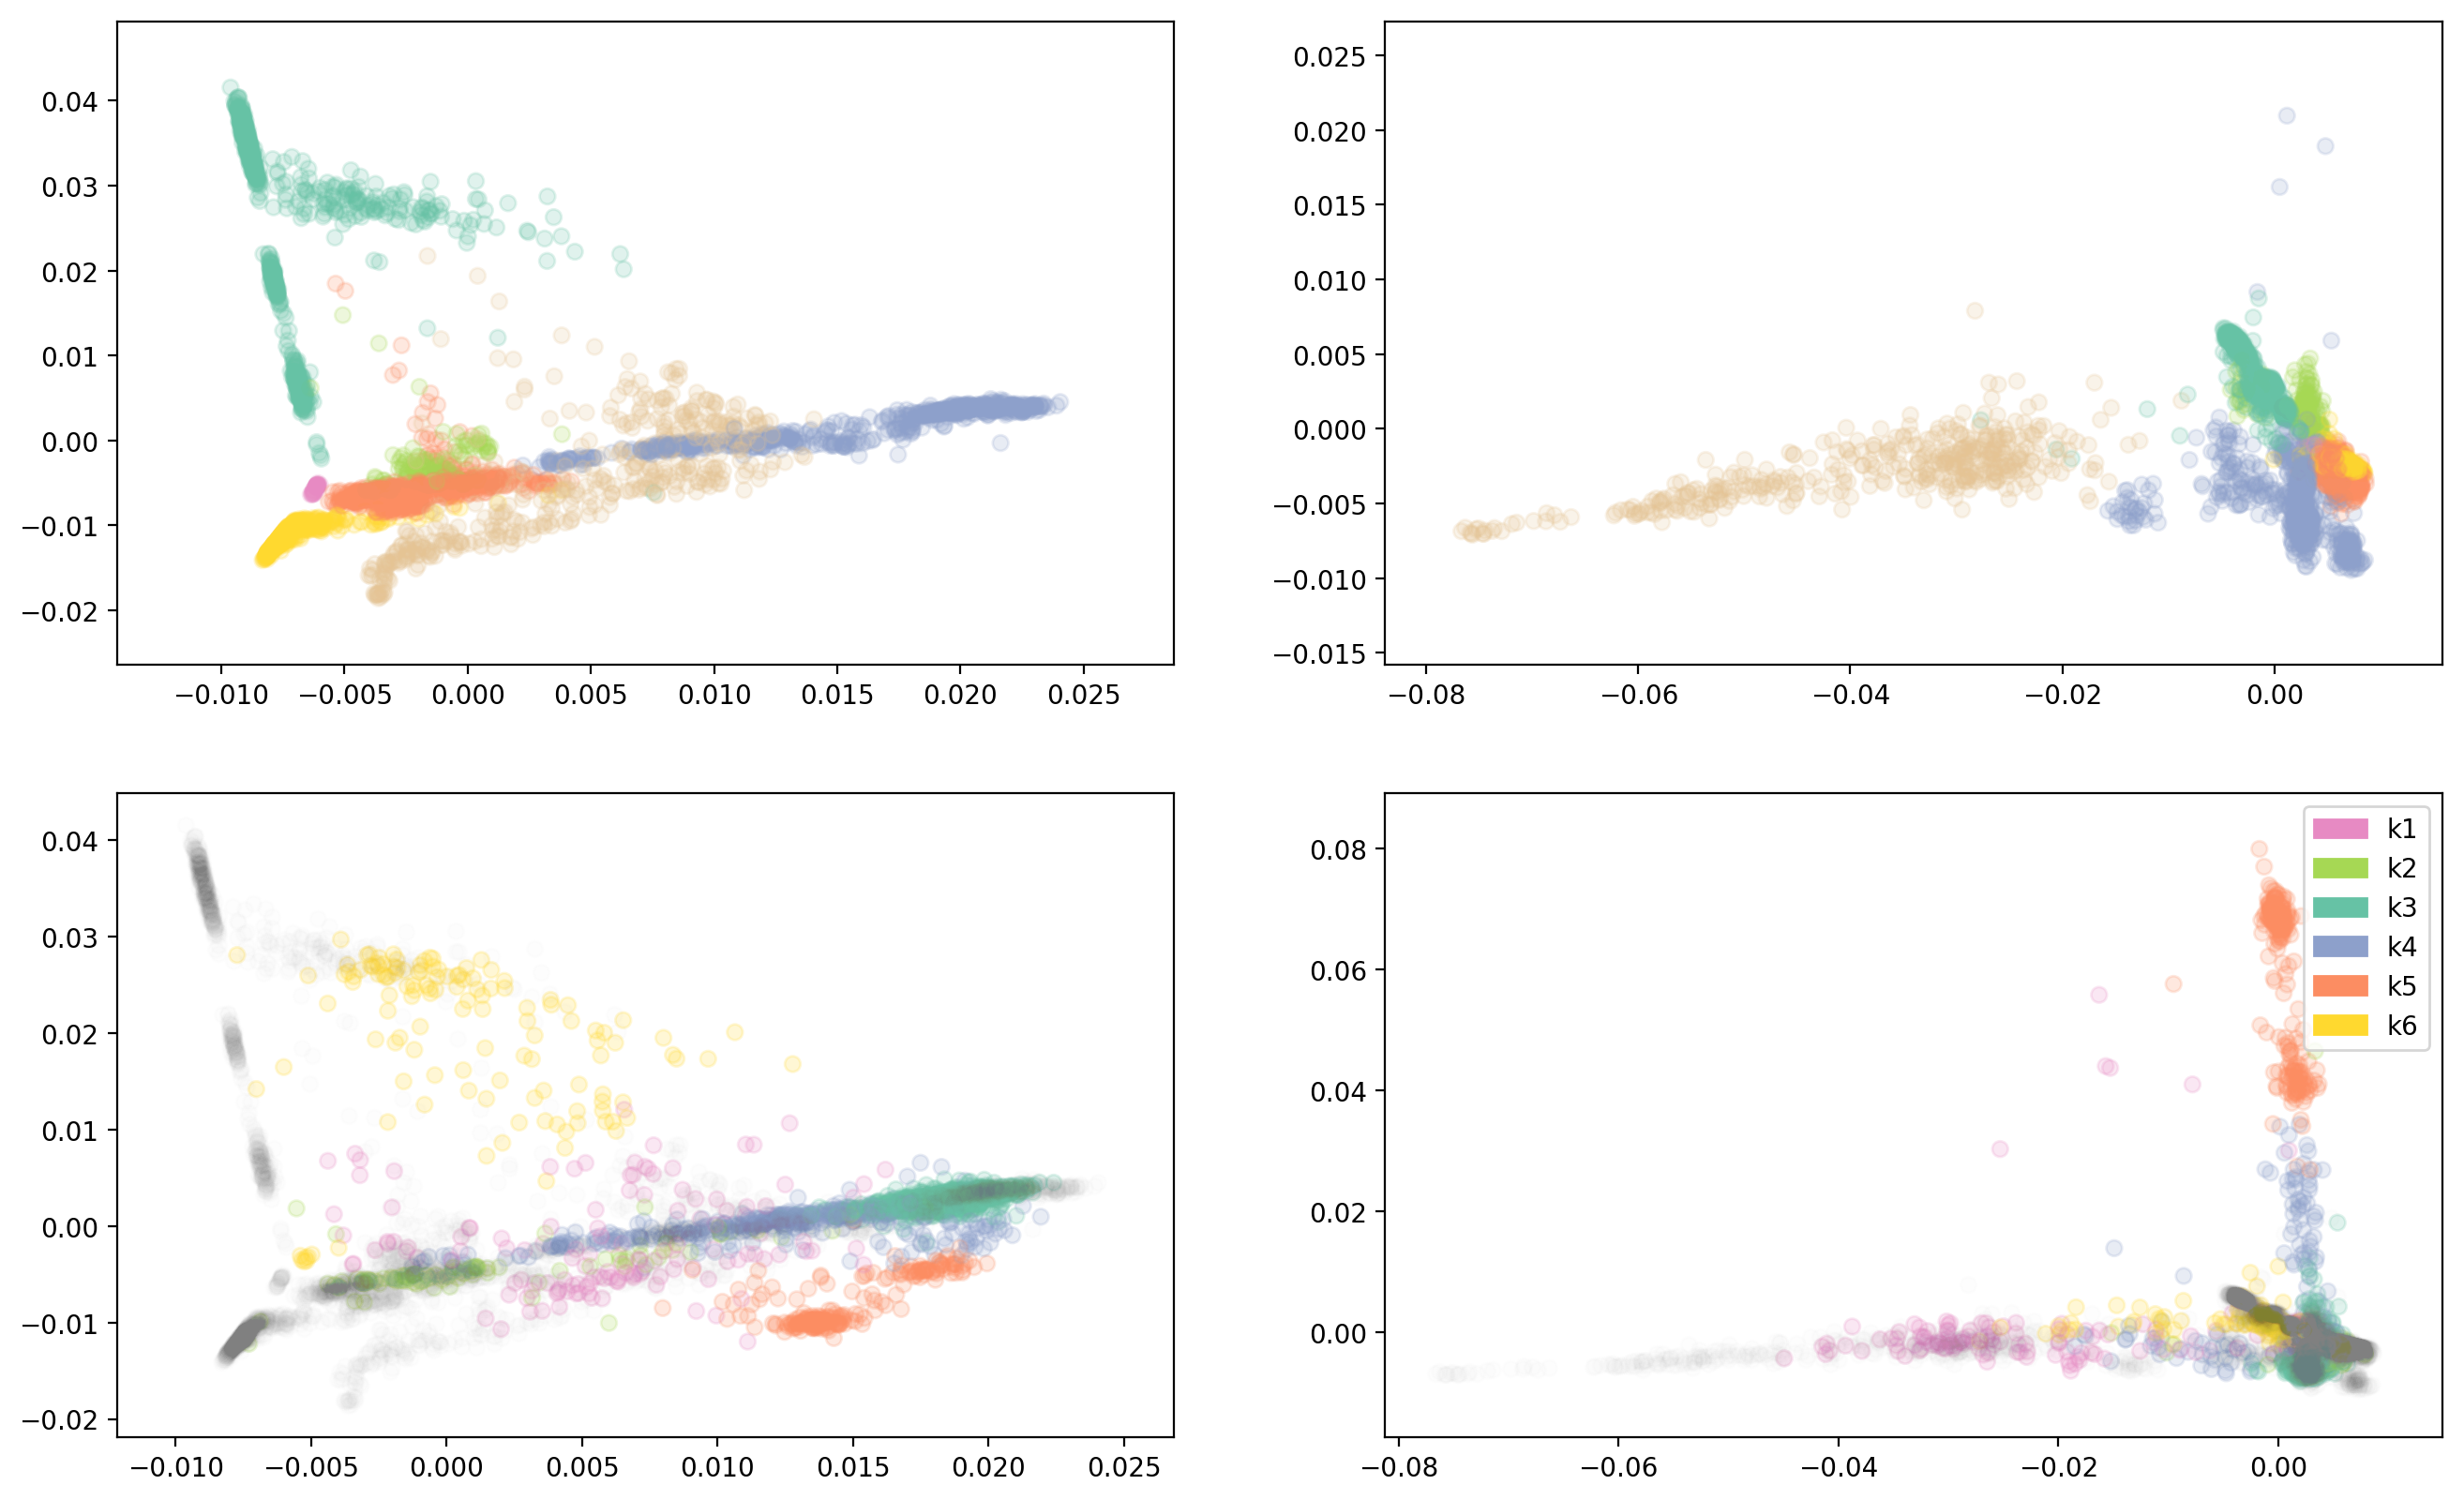

In [53]:
#FIGURE 2
#POP genetics?
#Plot reference super_pops
refPC1 = ibd_fs[ibd_fs['super_pop'] != 'ADAPT' ]['PC1'].reset_index(drop=True)
refPC2 = ibd_fs[ibd_fs['super_pop'] != 'ADAPT' ]['PC2'].reset_index(drop=True)
refPC3 = ibd_fs[ibd_fs['super_pop'] != 'ADAPT' ]['PC3'].reset_index(drop=True)
refPC4 = ibd_fs[ibd_fs['super_pop'] != 'ADAPT' ]['PC4'].reset_index(drop=True)
super_pop = ibd_fs[ibd_fs['super_pop'] != 'ADAPT' ]['super_pop'].reset_index(drop=True)

fig = plt.figure(figsize=(16, 10), dpi=200)
ax  = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

color_labels = super_pop.unique()
rgb_values   = sns.color_palette("Set2", 7)
color_map    = dict(zip(color_labels, rgb_values))

ax.scatter(refPC1, refPC2, c=super_pop.map(color_map), alpha=0.2 )
ax2.scatter(refPC3, refPC4, c=super_pop.map(color_map), alpha=0.2 )

#Legends 1
patch1 = mpatches.Circle( (0.5, 0.5), radius = 0.25, color=color_map['AFR'], label='AFR')
patch2 = mpatches.Circle( (0.5, 0.5), radius = 0.25, color=color_map['SAS'], label='SAS')
patch3 = mpatches.Circle( (0.5, 0.5), radius = 0.25, color=color_map['EUR'], label='EUR')
patch4 = mpatches.Circle( (0.5, 0.5), radius = 0.25, color=color_map['OCE'], label='OCE')
patch5 = mpatches.Circle( (0.5, 0.5), radius = 0.25, color=color_map['MDE'], label='MDE')
patch6 = mpatches.Circle( (0.5, 0.5), radius = 0.25, color=color_map['EAS'], label='EAS')
patch7 = mpatches.Circle( (0.5, 0.5), radius = 0.25, color=color_map['AMR'], label='AMR')

plt.legend(handles=[patch1,patch2,patch3,patch4,patch5,patch6,patch7])

PC1 = mergeddat['PC1']
PC2 = mergeddat['PC2']
PC3 = mergeddat['PC3']
PC4 = mergeddat['PC4']
groups = mergeddat['k6'] 
color_labels = groups.unique()
rgb_values   = sns.color_palette("Set2", 7)
color_map    = dict(zip(color_labels, rgb_values))

ax3.scatter(PC1, PC2, c=groups.map(color_map), alpha=0.2)
ax3.scatter(refPC1, refPC2, alpha=0.01, c='grey')
ax4.scatter(PC3, PC4, c=groups.map(color_map), alpha=0.2)
ax4.scatter(refPC3, refPC4, alpha=0.01, c='grey')

#Legends 2
patch1 = mpatches.Circle( (0.5, 0.5), radius = 0.25, color=color_map[1], label='k1')
patch2 = mpatches.Circle( (0.5, 0.5), radius = 0.25, color=color_map[2], label='k2')
patch3 = mpatches.Circle( (0.5, 0.5), radius = 0.25, color=color_map[3], label='k3')
patch4 = mpatches.Circle( (0.5, 0.5), radius = 0.25, color=color_map[4], label='k4')
patch5 = mpatches.Circle( (0.5, 0.5), radius = 0.25, color=color_map[5], label='k5')
patch6 = mpatches.Circle( (0.5, 0.5), radius = 0.25, color=color_map[6], label='k6')

plt.legend(handles=[patch1,patch2,patch3,patch4,patch5,patch6])

plt.show()


In [44]:
color_map[1]

(0.9058823529411765, 0.5411764705882353, 0.7647058823529411)

array([3, 5, 4, 1, 2, 6])

In [4]:
#Testing

myfig = mlab.figure(1, fgcolor=(0.5, 0.5, 0.5), bgcolor=(1, 1, 1),  size=(2000, 1750))
    
face = PCs_landmarks[0,:].reshape(7160, 3)
X = np.array(face[:,0]).flatten()
Y = np.array(face[:,1]).flatten()
Z = np.array(face[:,2]).flatten()

face2 = sex_landmarks[34,:].reshape(7160, 3)
dist = np.array(np.sqrt(np.sum(np.power(face2 - face, 2), axis=1))).flatten()

mesh = mlab.triangular_mesh(X,Y,Z, facets-1, representation='surface', figure = myfig, scalars = dist) #color=(0.5,0.5,0.5)
mesh.actor.property.line_width = 3.0
mesh.actor.property.backface_culling = True

mesh.scene.anti_aliasing_frames = 20
mesh.scene.camera.compute_view_plane_normal()
mesh.scene.camera.position = [-0.026, -0.043, 0.066]
mesh.scene.camera.focal_point = [0, 0, 0]
mesh.scene.camera.view_angle = 30.0
mesh.scene.camera.view_up = [-0.039, 0.847, 0.53]
mesh.scene.camera.clipping_range = [0.044, 0.13]
#mlab.outline(extent=(0,1,0,1,0,1))
#mlab.axes(extent=(0,1,0,1,0,1))
mlab.show()



In [6]:
#Functions
def print_face(landmarks, filename):
    mlab.options.offscreen = True #True or False
    myfig = mlab.figure(1, fgcolor=(0.5, 0.5, 0.5), bgcolor=(1, 1, 1),  size=(2000, 1750))
    
    face = landmarks.reshape(7160, 3)
    X = np.array(face[:,0]).flatten()
    Y = np.array(face[:,1]).flatten()
    Z = np.array(face[:,2]).flatten()
    mesh = mlab.triangular_mesh(X,Y,Z, facets-1, representation='surface',color=(0.5,0.5,0.5), figure = myfig)
    mesh.actor.property.line_width = 3.0
    mesh.scene.camera.compute_view_plane_normal()
    mesh.scene.camera.position = [-0.026, -0.043, 0.066]
    mesh.scene.camera.focal_point = [0, 0, 0]
    mesh.scene.camera.view_angle = 30.0
    mesh.scene.camera.view_up = [-0.039, 0.847, 0.53]
    mesh.scene.camera.clipping_range = [0.044, 0.13]
    mlab.savefig(filename)
    #mesh.scene.save("/home/tomas/Desktop/snapshot.png")
    #mesh.scene.save('/home/tomas/Desktop/snapshot.eps')
    #mlab.show()
    mlab.close()
    return


In [14]:
def print_2face(landmarks, filename):
    mlab.options.offscreen = False
    myfig = mlab.figure(1, fgcolor=(0.5, 0.5, 0.5), bgcolor=(1, 1, 1),  size=(2000, 1750))
    
    face1 = landmarks[0,:].reshape(7160, 3)
    X1 = np.array(face1[:,0]).flatten()
    Y1 = np.array(face1[:,1]).flatten()
    Z1 = np.array(face1[:,2]).flatten()
    
    face2 = landmarks[1,:].reshape(7160, 3)
    X2 = np.array(face2[:,0]).flatten()
    Y2 = np.array(face2[:,1]).flatten()
    Z2 = np.array(face2[:,2]).flatten()

    dist = np.array(np.sqrt(np.sum(np.power(face1 - face2, 2), axis=1))).flatten()
    
    mesh = mlab.triangular_mesh(X1,Y1,Z1, facets-1, representation='wireframe', figure = myfig) #scalars = dist
    mesh.actor.property.line_width = 3.0
    mesh.scene.camera.compute_view_plane_normal()
    mesh.scene.camera.position = [-0.026, -0.043, 0.066]
    mesh.scene.camera.focal_point = [0, 0, 0]
    mesh.scene.camera.view_angle = 30.0
    mesh.scene.camera.view_up = [-0.039, 0.847, 0.53]
    mesh.scene.camera.clipping_range = [0.044, 0.13]

    #point_data = mesh.mlab_source.dataset.point_data
    #point_data.scalars = dist
    #point_data.scalars.name = 'Point data'
    #point_data.update()

    #mesh2 = mlab.pipeline.set_active_attribute(mesh, point_scalars='Point data')
    
    #mlab.savefig(filename)
    mlab.show
    #mlab.close()
    return

In [7]:
print_face(sex_landmarks[0,:], "/home/tomas/Desktop/Test.obj")


In [24]:
for i in range(2):
    name = "/home/tomas/Desktop/Test" + str(i) + ".png"
    print_face(sex_landmarks[i,:], name)

In [25]:
face1 = sex_landmarks[0,:].reshape(7160, 3)
X1 = np.array(face[:,0]).flatten()
Y1 = np.array(face[:,1]).flatten()
Z1 = np.array(face[:,2]).flatten()

face2 = sex_landmarks[1,:].reshape(7160, 3)
X2 = np.array(face2[:,0]).flatten()
Y2 = np.array(face2[:,1]).flatten()
Z2 = np.array(face2[:,2]).flatten()

In [76]:
myfig = mlab.figure(1, fgcolor=(0.5, 0.5, 0.5), bgcolor=(1, 1, 1),  size=(2000, 1750))
face = sex_landmarks[10,:].reshape(7160, 3)
X = np.array(face[:,0]).flatten()
Y = np.array(face[:,1]).flatten()
Z = np.array(face[:,2]).flatten()
mesh = mlab.triangular_mesh(X,Y,Z, facets-1, representation='wireframe',color=(0.5,0.5,0.5), figure = myfig)
mesh.actor.property.line_width = 3.0
mesh.scene.camera.compute_view_plane_normal()
mesh.scene.camera.position = [-0.026, -0.043, 0.066]
mesh.scene.camera.focal_point = [0, 0, 0]
mesh.scene.camera.view_angle = 30.0
mesh.scene.camera.view_up = [-0.039, 0.847, 0.53]
mesh.scene.camera.clipping_range = [0.044, 0.13]
mlab.show()

(7160,)